In [1]:
pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2

  Using cached https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2 (21 kB)
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13698 sha256=5b495bb628c0caa48bee3ef0a960df402c116335d917bd9d9014d1e99673208c
  Stored in directory: /home/mmudunuri/.cache/pip/wheels/8e/c5/f1/f946df758c03d27a41267059e19bba92f39686ab3d4f9b6002
Successfully built prettytable
Note: you may need to restart the kernel to use updated packages.


Problem 1:

For a catchment, the following excess rainfall hyetograph (ERH) and direct runoff hydrograph (DRH) are given for a 3-hour storm event.  
a)  Compute the area of the catchment.

b)  Compute the unit hydrograph ordinates (0.5 hour interval) using least square regression. What is the duration of this unit hydrograph?

c)  Calculate a 75-min and a 90-min unit hydrograph from the one derived in (b).
 



Catchment Area = 55.535999999999994 Km^2
Precipiatation Matrix 
 [[1.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [3.   1.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [4.25 3.   1.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   4.25 3.   1.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [2.25 0.   4.25 3.   1.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.5  2.25 0.   4.25 3.   1.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  2.25 0.   4.25 3.   1.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  2.25 0.   4.25 3.   1.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  2.25 0.   4.25 3.   1.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  2.25 0.   4.25 3.   1.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.5  2.25 0.   4.25 3.   1.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.5  2.25 0.   4.25 3.   1.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.5  2.25 0.   4.25 3.   1.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.5  2.25

<ipython-input-21-d9740dad5739>:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  P = np.asarray(b,dtype=np.float)


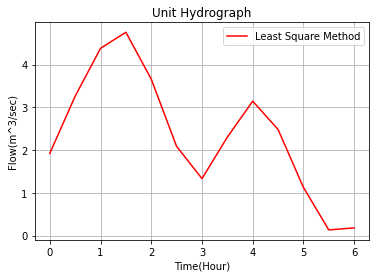

Ordinates of S-Curve Hydrograph:
 [1.9220176271792866, 3.2601565347071126, 4.379419658312425, 4.7556847837879, 3.659712428559056, 4.007118637921893, 4.592713935430099, 6.681951286282155, 7.898912963422254, 6.141746169973791, 5.133844137748845, 4.725459005734749, 6.862519185471682]
Enter the Duration of Unit Hydrograph (In Hours): 

3.5
Lagged S Hydrograph by duration D [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           1.92201763
   2.97126529   3.90488724   4.65834991   4.68512111   3.75815884
   3.78441245   4.16349384   4.87220981   6.5772672    7.87786694
   7.1732467    5.74266234   5.10090371   4.69505342   5.49538234
   8.83522221  16.04790475  28.46676167  47.42512472  74.2563256
 110.29369605 156.87056779]
[2.9712652928617516, 2.9712652928617516, 2.9712652928617516, 2.9712652928617516, 2.9712652928617516, 2.9712652928617516, 2.9712652928617516, 2.971265292861

In [21]:
#Making list of given data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import interpolate
Rainfall = np.array([2.5,6,8.5,0,4.5,1])
Time_1 = np.linspace(0,8.5,18)
Drh_o = np.array([0,12,22.5,33,42,42,35,28.5,27,29,26.6,20,13,7.5,5,3,1,0])


#Calculation of total area
R_s = sum(Rainfall)*0.001*0.5
Drh = sum(Drh_o)*0.5*3600
A = (Drh/R_s)*10**(-6)    
print("Catchment Area =",A,"Km^2")



# calculation of Unit Hydrograph ordinates
M = 6  #No.of Rainfall pulses
N = 18  #No.of Non zero flow detected in the DRH
k = N-M+1 
Dt = 0.5 #Time interval

Q = np.array([Drh_o]).T # 1*N Matrix For Runoff
H = np.array([Rainfall*Dt]).T # 1*M size Matrix For Rainfall

b = [] 
for i in range (k):
  a = np.pad(Rainfall*Dt, (i, N-M-i), 'constant', constant_values=(0,0))
  b.append(a)
P = np.asarray(b,dtype=np.float) 


PT= P.T    #Precipitation matrix
print('Precipiatation Matrix \n',PT)
#Multiply the [transpose of P] and [P] 
PTP = P.dot(PT)


#Obtain the matrix inverse of [PTP]
PTPINV=np.linalg.inv(PTP)




# pseudo-inverse matrix
Z = PTPINV.dot(P) 


UH = Z.dot(Q) # Unit Hydrograph From Least Square Method
Time = np.linspace(0,6,k)

from prettytable import PrettyTable
Table=PrettyTable(['Time','UH'])
for x in range(0,13):
  Table.add_row([Time[x],UH[x]])
print(Table)


time=  np.arange(0,6.5,0.5)
plt.plot(time,UH,'r-',label=  'Least Square Method')
plt.xlabel('Time(Hour)')
plt.ylabel('Flow(m^3/sec)')
plt.title('Unit Hydrograph')
plt.grid()
plt.legend()
plt.show()

#Calculation of unit hydrograph of 90 min and 75 min
U1 = np.append(UH,np.zeros(5))
U2 = np.append(np.zeros(5),UH)
U3 = np.append(np.zeros(10),UH)
S_c =[]
for i in range(0,len(UH)):
  summ = U1[i]+U2[i]+U3[i]
  S_c.append(summ)
  
print("Ordinates of S-Curve Hydrograph:\n", S_c)
Time_3 = np.linspace(np.min(Time_1),np.max(Time_1),23)
# print('time', len(Time_3))
# print('scccc: ', len(S_c))
U_n = interpolate.make_interp_spline(Time_1[0:13], S_c[0:len(Time_1)])
U_sm= np.asarray(U_n(Time_3))


#TO make list of list as a list
b1 = []
for i in U_sm:
  b1.append(i)



#Input of desired duration for  UH
print("Enter the Duration of Unit Hydrograph (In Hours): \n")
DU = float(input())
Si = int(DU/0.25)
S1 = np.append(np.zeros(Si),b1)
print("Lagged S Hydrograph by duration D", S1)






#Calculation of difference of S curve Hydrograph Lagged by desired duration 
D_S =[]
a1 = []
for i in range(0, len(b1)):
  a1 = b1[1]-S1[i]
  D_S.append(a1)

print(D_S)
D_Sa = np.asarray(D_S)
S_DU = DU - D_Sa*(sum(D_S)/DU)
print("The ordinate of DU Hour duration unit hydrograph is as follows", S_DU)

Problem 2:

Write two computer programs for kinematic wave routing using
 (a) Linear Method; (b) Non-Linear Method. Each program needs to have the following features:

•	Ask the user for channel cross-section with two options to choose from: a) Rectangular section; b) Trapezoidal section

•	If rectangular section is chosen, ask to input the bottom width (in m).

•	If trapezoidal section is chosen, ask to input the bottom width (in m) and side slope (in degrees with vertical).

•	Ask the user to input the longitudinal slope of the channel (dimensionless)

•	Ask the user to input the length (L) of the channel (in m) for which the simulation has to be done 

•	Ask the user to input the values of x and t. (you may set some default values for this)

•	Upstream boundary condition: user input hydrograph. (For intermediate times that may be required for the specified t, you may use linear interpolation)

•	Use a uniform flow as the initial condition with a user specified discharge

Length of the Channel where water surface profile is to be simulated (L) = 5 km, x = 100 m and t = 1 min

Channel Bed Slope: 0.015, Manning’s n = 0.02

Width of the Rectangular Channel is 90 m
Width and the side slope of the trapezoidal channel are 60 m and 30o (with vertical), respectively.




In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import files
from tabulate import tabulate
from scipy import optimize
from scipy import interpolate # To make Smooth Graph
uploaded=files.upload()
import io
UBCH=pd.read_excel(io.BytesIO(uploaded['L10-Q2.xlsx']))
print(UBCH)